In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def activacion(x):
  return 1 if x >= 0 else 0

In [3]:
activacion_v = np.vectorize(activacion)

In [4]:
def neurona(ent, pesos, bias):
  neta = np.dot(pesos,ent.T)-bias
  return activacion_v(neta)

In [5]:
def perceptron(ents,sals,n,n_patrones=10,max_it=1000):
  #Inicializo los pesos
  pesos = 2*np.random.rand(ents.shape[1])- 1
  bias = 2*np.random.rand(1) - 1

  p = 0
  it = 0
  loss = [] #Error cuadratico medio sum(e^2)/n
  #Condición de parada
  while(p <= n_patrones and it <= max_it):
    it += 1
    error_it = 0
    for ent,t in zip(ents,sals):
      y = neurona(ent,pesos,bias)
      error = t - y[0]
      error_it += error**2
      p+=1

      if error != 0:
        p = 0
        pesos = pesos + n*error*ent
        bias = bias + n*error*(-1)

    error_it /= ents.shape[0]
    loss.append(error_it)

  return pesos,bias,loss

In [6]:
ents = np.array([[x,y,z,w,a] for x in range(0,2)
                   for y in range(0,2)
                   for z in range(0,2)
                   for w in range(0,2)
                   for a in range(0,2)])

sals = np.array(list(map(lambda e: e[0] or e[1] or e[2] or e[3] or e[4], ents)))

In [7]:
n = 0.3
max_it = 200
p = 2**5
pesos,bias,loss = perceptron(ents, sals, n, p, max_it)

In [8]:
print(pesos,bias)

[0.69831114 0.49199464 0.01473831 0.03240856 0.46518826] [0.00138572]


In [9]:
for ent, sal in zip(ents,sals):
  print(ent,sal,neurona(ent,pesos,bias)[0])

[0 0 0 0 0] 0 0
[0 0 0 0 1] 1 1
[0 0 0 1 0] 1 1
[0 0 0 1 1] 1 1
[0 0 1 0 0] 1 1
[0 0 1 0 1] 1 1
[0 0 1 1 0] 1 1
[0 0 1 1 1] 1 1
[0 1 0 0 0] 1 1
[0 1 0 0 1] 1 1
[0 1 0 1 0] 1 1
[0 1 0 1 1] 1 1
[0 1 1 0 0] 1 1
[0 1 1 0 1] 1 1
[0 1 1 1 0] 1 1
[0 1 1 1 1] 1 1
[1 0 0 0 0] 1 1
[1 0 0 0 1] 1 1
[1 0 0 1 0] 1 1
[1 0 0 1 1] 1 1
[1 0 1 0 0] 1 1
[1 0 1 0 1] 1 1
[1 0 1 1 0] 1 1
[1 0 1 1 1] 1 1
[1 1 0 0 0] 1 1
[1 1 0 0 1] 1 1
[1 1 0 1 0] 1 1
[1 1 0 1 1] 1 1
[1 1 1 0 0] 1 1
[1 1 1 0 1] 1 1
[1 1 1 1 0] 1 1
[1 1 1 1 1] 1 1


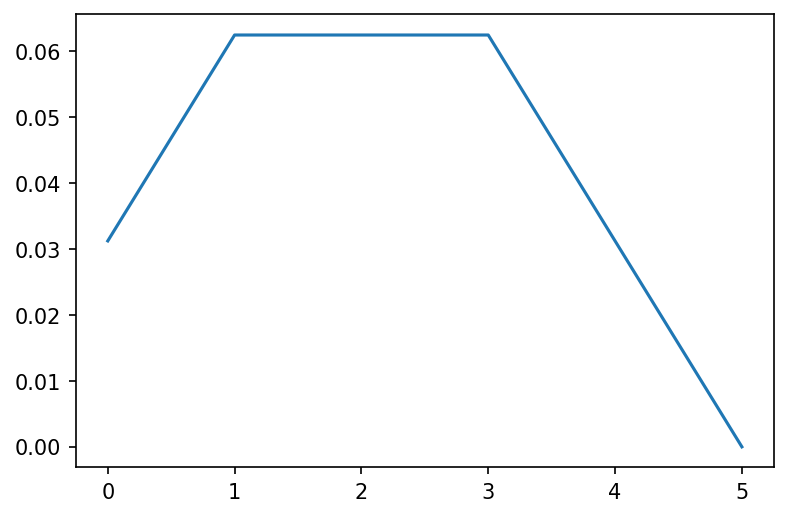

In [ ]:
plt.figure(dpi=150)
plt.plot(loss)

In [ ]:
entsB = np.array([[x,y,z,w,a] for x in range(0,2)
                   for y in range(0,2)
                   for z in range(0,2)
                   for w in range(0,2)
                   for a in range(0,2)])

salsB = np.array(list(map(lambda e: e[0] and e[1] and e[2] and e[3] and e[4], entsB)))

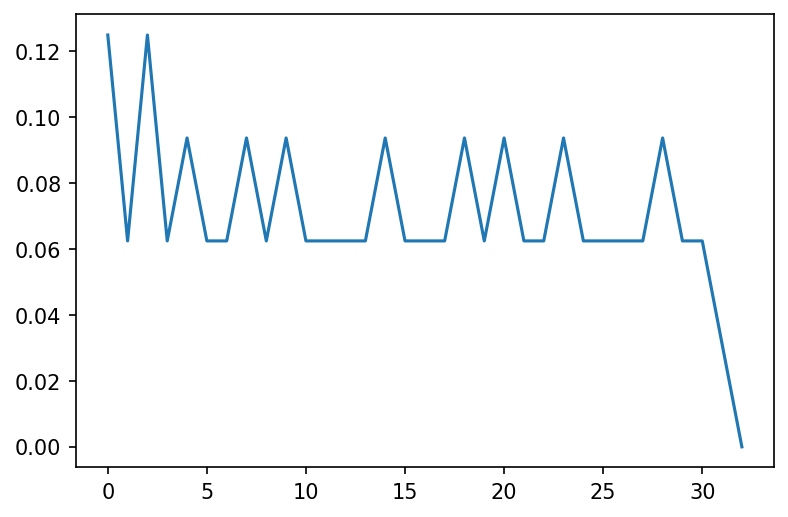

In [ ]:
n = 0.5
max_it = 10000
p = 2**5
pesos,bias,loss = perceptron(entsB, salsB, n, p, max_it)
plt.figure(dpi=150)
plt.plot(loss)

In [ ]:
def xor(a,b):
  if a == b:
    return 0
  else:
    return 1

entsC = np.array([[x,y,z,w,a] for x in range(0,2)
                   for y in range(0,2)
                   for z in range(0,2)
                   for w in range(0,2)
                   for a in range(0,2)])

salsC = np.array(list(map(lambda e: e[0] or xor(e[1],e[2]) or e[3] and e[4], entsC)))

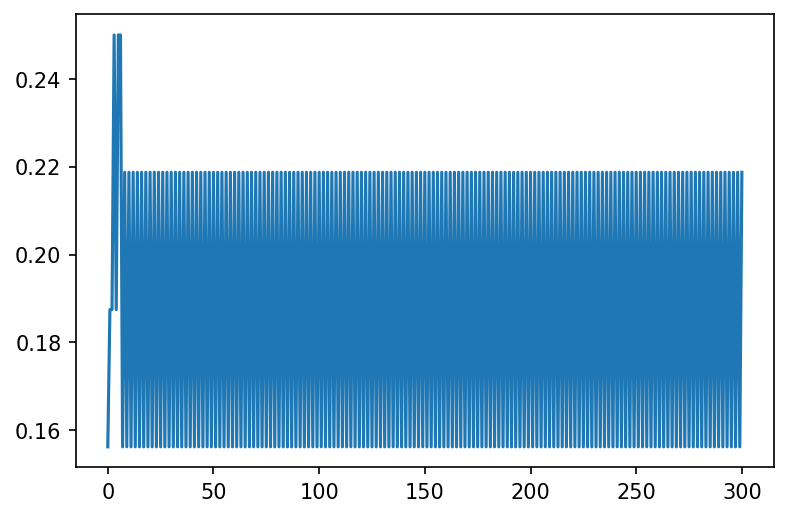

In [ ]:
n = 0.5
max_it = 300
p = 2**5
pesos,bias,loss = perceptron(entsC, salsC, n, p, max_it)
plt.figure(dpi=150)
plt.plot(loss)